In [397]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [402]:
# PART A
x_i_raw = np.genfromtxt('./ass1_data/linearX.csv', delimiter=',')
y_i = np.genfromtxt('./ass1_data/linearY.csv', delimiter=',')
theta = np.array([0.00, 0.00])
m = x_i_raw.size
n = 1.95

# Normalize data
mean = 0
squared_sum = 0
for xi in x_i_raw:
    mean += xi
    squared_sum += xi*xi
mean = mean/m
e_x_squared = squared_sum/m
variance = e_x_squared - mean*mean

x_i_norm = np.array([(xi-mean)/variance for xi in x_i_raw])
x_i = np.array([[xi, 1] for xi in x_i_norm])
# print (x_i_norm)

In [403]:
# Detect Convergence
epsilon = 0.00000001
def converged(theta_next, theta):
    converged = True
    for d in range(theta.size):
        converged = converged and abs(theta_next[d] - theta[d]) < epsilon
    return converged

Starting iteration 0


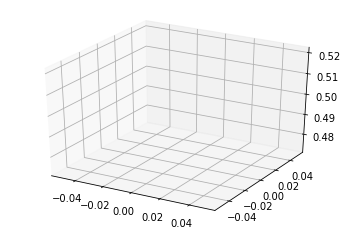

Starting iteration 1


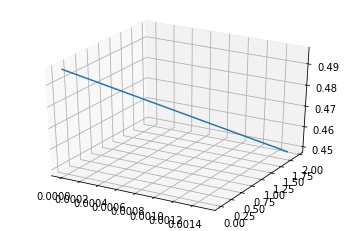

Starting iteration 2


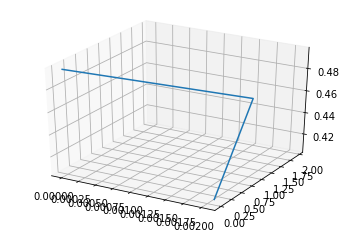

Starting iteration 3


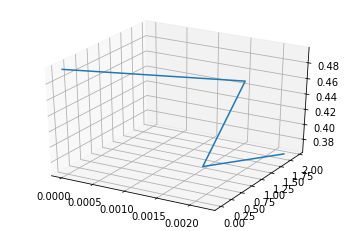

Starting iteration 4


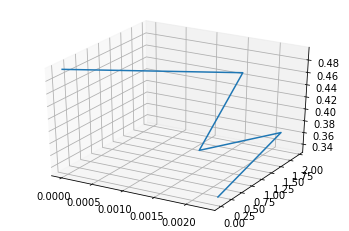

Starting iteration 5


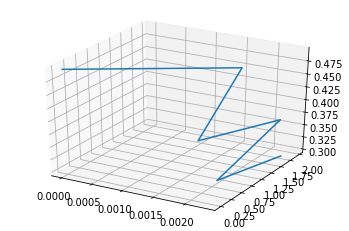

Starting iteration 6


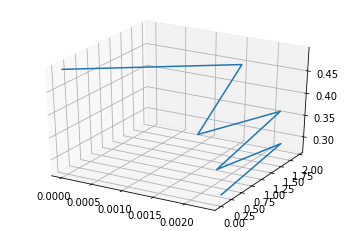

Starting iteration 7


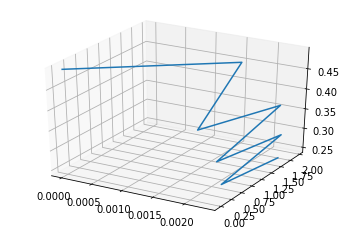

Starting iteration 8


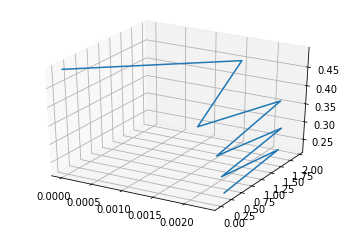

Starting iteration 9


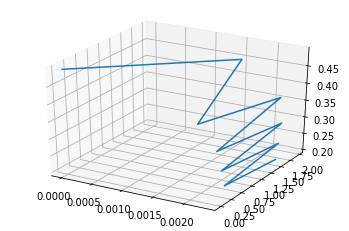

Starting iteration 10


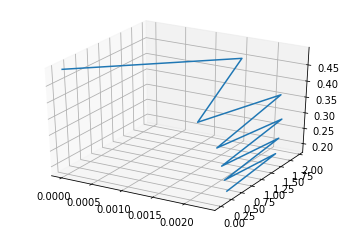

Starting iteration 11


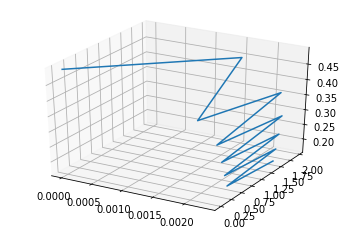

Starting iteration 12


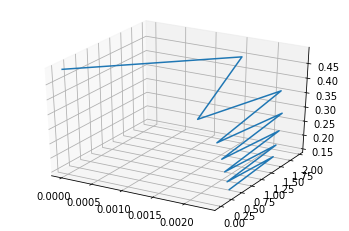

Starting iteration 13


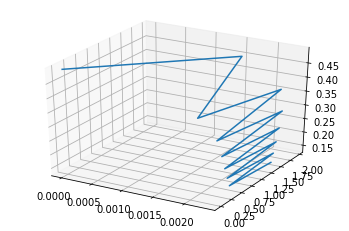

Starting iteration 14


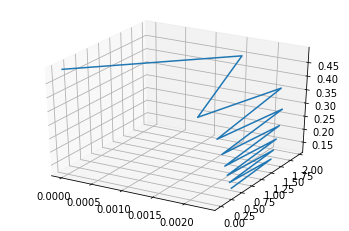

Starting iteration 15


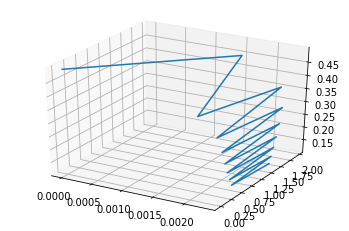

Starting iteration 16


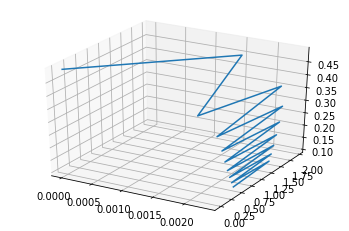

Starting iteration 17


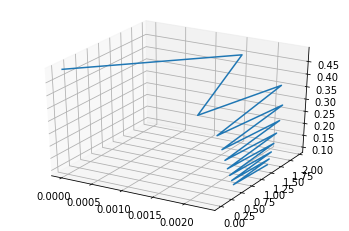

KeyboardInterrupt: 

In [404]:
# Gradient Descent
num_iterations = 0
total_iterations = 10

theta_0 = np.array([])
theta_1 = np.array([])
error_func = np.array([])

while(True):
    theta_next = np.array([0.00, 0.00])
    j_theta = 0
    for j in range(theta.size):
        sum = 0
        for i in range(m):
            hyp = np.dot(theta, x_i[i])
            sum = sum + x_i[i][j]*(y_i[i] - hyp)
            j_theta = j_theta + (y_i[i] - hyp)*(y_i[i] - hyp)
        theta_next[j] = theta[j] + n*sum/m
        
    if (converged(theta_next, theta)):
        break
        
    # Plot J(theta) vs theta for PART C
    j_theta = j_theta/(4*m)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    theta_0 = np.append(theta_0, theta[0])
    theta_1 = np.append(theta_1, theta[1])
    error_func = np.append(error_func, j_theta)
    
    ax.plot(theta_0, theta_1, error_func)
    plt.show(block=False)
    plt.pause(0.2)
    plt.close()
    
    theta = theta_next
    num_iterations += 1
    
print (theta)
print (num_iterations)

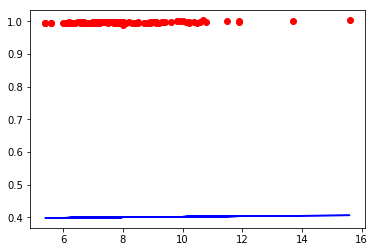

In [270]:
# PART B
# Plot Graphs
h_theta = np.array([np.dot(theta, xi) for xi in x_i])
plt.plot(x_i_raw, y_i, 'ro')
plt.plot(x_i_raw, h_theta, 'b-')